# PHYS 381 - Assignment #1  
#### January 17, 2018
John Ming Ngo (30020834)

Kenneth Barry Sharman (00300185)

### Question 1: Why are the two results different?  Should we worry about this?
The two results are different due to the representation of floating point numbers in the computer memory system. The order of the operations is different for each function, and the operations themselves are different. For example, exponentiation is used only in one function. Even though two series may be mathematically equivalent, the values are propagated through a different history and as such are stored differently in the computer. 

We should worry about this if our calculation requires high precision. In the above example, the two functions differ on the order of e-17, so we should be safe down to roughly e-15. We should also worry if we're looking to do a Boolean compare between the two values. If we naively do a direct == comparison the result will be false even if the two results are supposed to be the same. A comparison to check similarity down to a certain tolerance is more robust for floating point comparisons: abs(resultOne - resultTwo) < 1e-14, for example.

When considering the different amount of time required to process each function, we have learnt that exponentiation is a time-consuming process. Furthermore, in Horner's method, we only do addition and multiplication, whereas in the forward eval method, we do addition, multiplication and exponentiation - we have one extra step altogether. If for any given input n, one function performs two operations on n and another performs three. Since the two operations are also present in the three operations, it is reasonable to expect that the two-operations method will be faster.

Good algorithms are not just fast but they require fewer steps and thus typically occur less round-off error. Both subjects are major areas of interest to the computational scientist.

### Question 2: Write a function which uses numpy to evaluate the Taylor series expansion of sin(x) for an array of x, and an arbitrary number of terms ie.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def poly_eval_basic_forward(x, coeff):
    result = 0.0
    for n,c in enumerate(coeff):
        result = result + c * x**n
    return result

def poly_eval_basic_reverse(x, coeff):
    result = coeff[-1]
    for c in coeff[-2::-1]:
        result = result * x + c
    return result

In [3]:
def sin_eval_taylor(x, ncoeff, forward = False):
    '''
    Assume Taylor Series is centered about '0' (MacLaurin series).
    
    The derivatives of sine around 0 cycle through (0, 1, 0, -1) and thus the
    coefficients of the Taylor series also cycle in this manner. 
    The nth coefficient is divided by the factorial of its nth term. The Taylor
    polynomial is then calculated using a polynomial evaluation function.
    For each input x-value, a list is returned, whose values correspond to the 
    values evaluated by the Taylor series.
    
    #This function utilizes the two prior functions above - forward
    calculation and backwards Horner's method function.
    
    This function overloads at approximately ncoeff>170 due to floating point
    calculation problems.

    '''
    #Generates the coefficients for the polynomial calculations.
    coefficients = []
    n = ncoeff+1
    for aCoefficient in range(n):
        factorialValue = np.math.factorial(aCoefficient)
        if aCoefficient % 4 == 0 or aCoefficient % 4 == 2:
            coefficients.append(0)
        elif aCoefficient % 4 == 1:
            coefficients.append(1.0/factorialValue)
        elif aCoefficient % 4 == 3:
            coefficients.append(-1.0/factorialValue)
    #Generates the calculated results.
    result = []
    if forward:
        for value in x:
            result.append(poly_eval_basic_forward(value, coefficients))
    else:
        for value in x:
            result.append(poly_eval_basic_reverse(value, coefficients))
    return result

print("sin(0.5) with 99 terms =", sin_eval_taylor([0.5], 99))
#%timeit sin_eval_taylor([0.5], 99)

sin(0.5) with 99 terms = [0.479425538604203]


### Question 3: Use sin_eval_taylor to plot Taylor series expansions of sin(x) for order n=1, 3, 17, 29 and compare to the "true" value.  Try to make the figure look *exactly* like the one included below.

In [4]:
# Create 2 sets of x-values- One for sin(x) and one for the functions of varying degrees.
x = np.arange(-3*np.pi, 3*np.pi, 0.18)
x_sin = np.arange(-12, 8, 0.2)

In [5]:
# Create y-values for sin(x), and the Taylor series expansion for order n=1, 3, 17, 29.
y_sin = [np.math.sin(i) for i in x_sin]
N1 = sin_eval_taylor(x,1)
N3 = sin_eval_taylor(x,3)
N17 = sin_eval_taylor(x,17)
N29 = sin_eval_taylor(x,29)

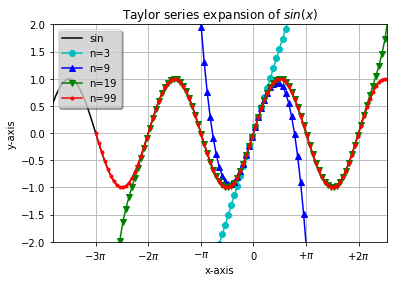

In [6]:
# Set the range for the x and y values on graph.
plt.ylim(-2.0,2.0)
plt.xlim(-12, 8)

# Customize x-values on axis to show Latex style multiples of Pi.
plt.xticks([-3*np.pi, -2*np.pi, -1*np.pi, 0, np.pi, 2*np.pi],
           ['$-3\pi$', r'$-2\pi$', r'$-\pi$', r'$0$', r'$+\pi$', r'$+2\pi$'])

# Create plots for each function, with specific color, marker, and label.
plt.plot(x_sin, y_sin, label='sin', color='k')
plt.plot(x, N1, label='n=3', color='c', marker='o')
plt.plot(x, N3, label='n=9', color='blue', marker='^')
plt.plot(x, N17, label='n=19', color='g', marker='v')
plt.plot(x, N29, label='n=99', color='r', marker='o', markersize=3)

# Label vertical & horizontal axis and add graph title.
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Taylor series expansion of $sin(x)$')

# Add grid with solid lines to graph
plt.grid(linestyle='solid')

# Add legend to upper left corner, with a shadow, grey in color, and semi-transparent.
legend = plt.legend(loc='upper left', shadow=(True))
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
plt.show()

### Question 4: What are the absolute and the relative error (in percent) for Taylor series expansion of sin(x) at x=0.5 for n=3, 9, 29? Compare results of forward summing to reverse.  How else might we reduce roundoff error?

In [7]:
#Run program to get absolute and relative errors.
def getResults(forward = False, inputType = np.float64, inputValue = 0.5):
    '''
    Function evaluates absolute and relative error for sin_eval_taylor(0.5)
    for n=3, 9, and 29.
    Results are printed on screen.
    '''
    #Calculates results
    x = np.array([inputValue], dtype = inputType)
    N3 = sin_eval_taylor(x, 3, forward)
    N9 = sin_eval_taylor(x, 9, forward)
    N29 = sin_eval_taylor(x, 29, forward)
    sineValue = np.sin(x)
    
    #Calculates Abs Error
    N3Error = np.abs(N3[0]-sineValue[0])
    N9Error = np.abs(N9[0]-sineValue[0])
    N29Error = np.abs(N29[0]-sineValue[0])

    #Calculates Rel. Error
    N3RelError = np.abs(N3Error/sineValue[0] * 100)
    N9RelError = np.abs(N9Error/sineValue[0] * 100)
    N29RelError = np.abs(N29Error/sineValue[0] * 100)

    #Prints Case:
    if forward:
        print("Forward Case Results:")
    else:
        print("Reverse Case Results:")

    #Prints Results:
    print("Absolute N3 Error: ", '{:.2e}'.format(N3Error))
    print("Relative N3 Error: ", '{:.2e}'.format(N3RelError), "%")
    print("Absolute N9 Error: ", '{:.2e}'.format(N9Error))
    print("Relative N9 Error: ", '{:.2e}'.format(N9RelError), "%")
    print("Absolute N29 Error:", '{:.2e}'.format(N29Error))
    print("Relative N29 Error:", '{:.2e}'.format(N29RelError), "%")
    print()
getResults(True)
getResults()

Forward Case Results:
Absolute N3 Error:  2.59e-04
Relative N3 Error:  5.40e-02 %
Absolute N9 Error:  1.22e-11
Relative N9 Error:  2.55e-09 %
Absolute N29 Error: 0.00e+00
Relative N29 Error: 0.00e+00 %

Reverse Case Results:
Absolute N3 Error:  2.59e-04
Relative N3 Error:  5.40e-02 %
Absolute N9 Error:  1.22e-11
Relative N9 Error:  2.55e-09 %
Absolute N29 Error: 0.00e+00
Relative N29 Error: 0.00e+00 %



Comparing the Forward and Reverse cases above, the summation results are identical in terms of errors and percentage errors. It would seem that whatever roundoff errors are introduced by the particular methods, as noted in prior questions, are drowned out by the taylor series approximation errors where they might matter, and then eliminated when floating point sizes are increased.

It is essential to note the fact that we are assuming the sine function to be exact, however it is also only an approximation (again due to floating point representation). Thus, when we say the error is eliminated we actually mean that the two functions are in agreement up to the floating point precision.

Reducing roundoff error can be done by increasing float size and reducing algebraic operations. Whenever a high level of precision is required; we aim to minimize the sum of approximation (algorithmic) error and round-off error.